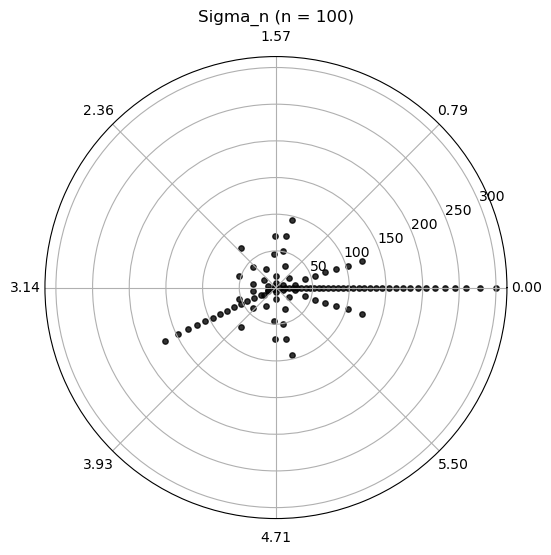

/Users/barrybrent/Documents/my files/me/my math/SageMath/tau-sigma paper/Sigma_roots_100.pdf

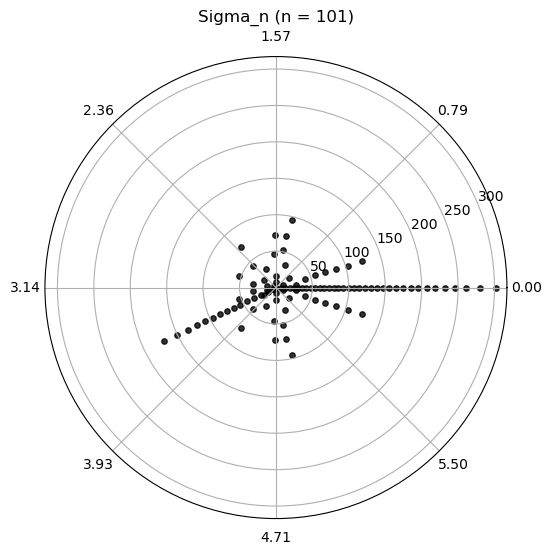

/Users/barrybrent/Documents/my files/me/my math/SageMath/tau-sigma paper/Sigma_roots_101.pdf

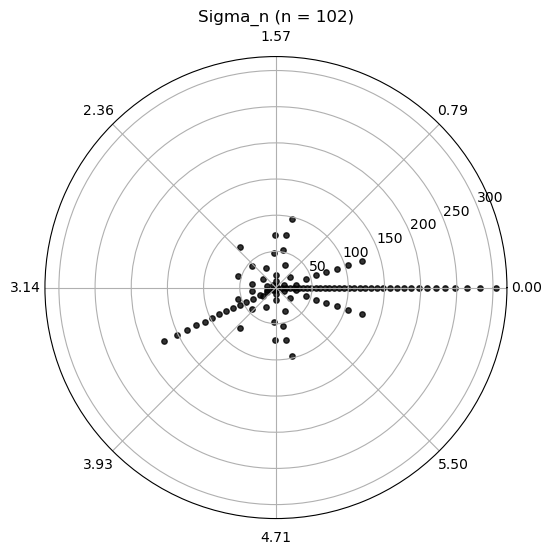

/Users/barrybrent/Documents/my files/me/my math/SageMath/tau-sigma paper/Sigma_roots_102.pdf


Global table of (n, r, theta*pi) for all polynomial roots:
[100, 168.08522953558906, 9.869604401089358]
[100, 148.59347406045578, 9.869604401089358]
[100, 132.86303694276788, 9.869604401089358]
[100, 119.09553519511215, 9.869604401089358]
[100, 106.5830260268514, 9.869604401089358]
[100, 94.94282929247143, 9.869604401089358]
[100, 83.92893102787247, 9.869604401089358]
[100, 73.366095986706, 9.869604401089358]
[100, 63.12223620500117, 9.869604401089358]
[100, 53.08384383999931, 9.869604401089358]
[100, 43.11578208538455, 9.869604401089358]
[100, 32.97127528409428, 9.869604401089358]
[100, 22.276488883602486, 9.869604401089358]
[100, 11.67890710366809, 9.869604401089358]
[100, 3.1648847570697627, 9.869604401089358]
[100, 1.1005140816987988, 9.869604401089358]
[100, 6.12269885879808, 0.0]
[100, 11.893971709133773, 0.0]
[100, 17.544997693865422, 0.0]
[100, 23.195996084529387, 0.0]
[100, 28.89110940428729, 0.0]
[100, 34.645543694306966, 0.0]
[100, 40.46969189107037, 0.0]
[100, 46.375627879

In [1]:
upper_bound = 103
lower_bound = 100

import matplotlib.pyplot as plt
import numpy as np
from sage.all import factorial, sigma, QQ, CC
from IPython.display import display, FileLink

def nieburTau(n):
    def step1(n, k):
        return 35*k^4 - 52*k^3*n + 18*k^2*n^2
    def step2(n, k):
        return sigma(k) * sigma(n - k)
    def step3(n):
        ans = 0
        for k in range(1, n):
            ans += step1(n, k) * step2(n, k)
        return 24*ans
    return n^4 * sigma(n) - step3(n)

Rx.<x> = QQ[]
char_polys = []
for n in range(lower_bound, upper_bound):
    lst = []
    for k in range(0, n+1):
        lst.append(factorial(n) * nieburTau(n-k+1) * x^k / factorial(k))
    al = Rx(sum(lst))
    char_polys.append((n, al))

def plot_show_save_polar(poly, n, plot_point_size=15):
    roots = [complex(r) for r in poly.roots(ring=CC, multiplicities=False)]
    if not roots:
        print(f"No roots for n={n}")
        return []

    r_vals = []
    theta_vals = []
    polar_triplets = []

    for z in roots:
        r = abs(z)
        theta = np.angle(z)
        theta_pi = float(np.pi * theta)
        r_vals.append(float(r))
        theta_vals.append(theta_pi)
        polar_triplets.append([n, float(r), theta_pi])

    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111, projection='polar')
    ax.scatter(theta_vals, r_vals, c='black', s=plot_point_size, alpha=0.8)
    ax.set_title(f"Sigma_n (n = {n})")
    tick_angles = np.linspace(0, 2*np.pi, 9)[:-1]
    tick_labels = [f"{angle:.2f}" for angle in tick_angles]
    ax.set_xticks(tick_angles)
    ax.set_xticklabels(tick_labels)

    filename = f"Sigma_roots_{n}.pdf"
    fig.savefig(filename, bbox_inches='tight')  # Save BEFORE show()
    plt.show()                                 # Display inline AFTER saving

    display(FileLink(filename))                # Clickable download link

    plt.close(fig)                            # Close explicitly after show

    return polar_triplets

all_triplets = []
for n, poly in char_polys:
    triplets = plot_show_save_polar(poly, n)
    all_triplets.extend(triplets)

print("\nGlobal table of (n, r, theta*pi) for all polynomial roots:")
for triple in all_triplets:
    print(triple)
